A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

Submission
    Purchase	User_ID	Product_ID

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample_submission=pd.read_csv("sample_submission_V9Inaty.csv")

In [3]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [5]:
sample_submission

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842
...,...,...,...
233594,100,1006036,P00118942
233595,100,1006036,P00254642
233596,100,1006036,P00031842
233597,100,1006037,P00124742


In [6]:
train["data"]="train"


In [7]:
test["data"]="test"

In [8]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368,train
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371,train
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137,train
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365,train


#Decriptive Analytics
--------------------------------------

In [9]:
data=pd.concat([train,test])

In [10]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,test
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,test
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,test
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,test


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  data                        783667 non-null  object 
dtypes: float64(3),

In [12]:
data.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,783667,NaN,NaN,NaN,1.00303e+06,1727.27,1e+06,1.00152e+06,1.00308e+06,1.00448e+06,1.00604e+06
Product_ID,783667,3677,P00265242,2709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,783667,2,M,590031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,783667,7,26-35,313015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,783667,NaN,NaN,NaN,8.0793,6.52221,0,2,7,14,20
City_Category,783667,3,B,329739,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,783667,5,1,276425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,783667,NaN,NaN,NaN,0.409777,0.491793,0,0,0,1,1
Product_Category_1,783667,NaN,NaN,NaN,5.3662,3.87816,1,1,5,8,20
Product_Category_2,537685,NaN,NaN,NaN,9.84451,5.08909,2,5,9,15,18


In [13]:
data.duplicated().sum()

0

In [14]:
data[data.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data


In [15]:
data["User_ID"].duplicated().sum()

777776

In [16]:
data.apply(lambda x: x.nunique())

User_ID                        5891
Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
data                              2
dtype: int64

In [17]:
data.apply(lambda x : print(x.value_counts()))


1001680    1468
1004277    1384
1001941    1286
1001181    1230
1000889    1204
           ... 
1000708      13
1005117      13
1000341      13
1002037      13
1005804      13
Name: User_ID, Length: 5891, dtype: int64
P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00305442       1
P00022042       1
P00039042       1
P00306542       1
P00359842       1
Name: Product_ID, Length: 3677, dtype: int64
M    590031
F    193636
Name: Gender, dtype: int64
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64
4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64
B    329739
C    243684
A    210244
Name: City_C

User_ID                       None
Product_ID                    None
Gender                        None
Age                           None
Occupation                    None
City_Category                 None
Stay_In_Current_City_Years    None
Marital_Status                None
Product_Category_1            None
Product_Category_2            None
Product_Category_3            None
Purchase                      None
data                          None
dtype: object

In [18]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
data                               0
dtype: int64

Exploratory Data Analysis (EDA)
----------------------------------------------

<AxesSubplot:xlabel='Age'>

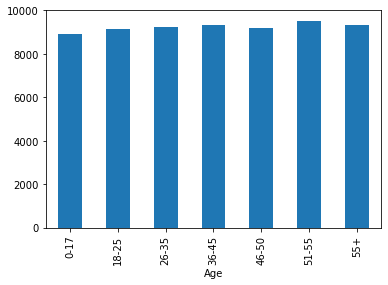

In [20]:
data.groupby("Age").Purchase.mean().plot(kind="bar")

<AxesSubplot:xlabel='Product_Category_1'>

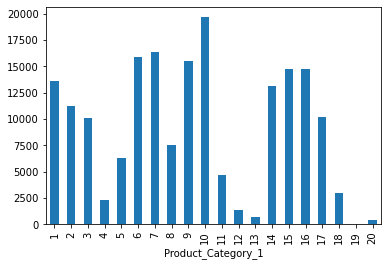

In [21]:
data.groupby("Product_Category_1").Purchase.mean().plot(kind="bar")

<AxesSubplot:xlabel='Product_Category_1,Product_Category_2,Product_Category_3'>

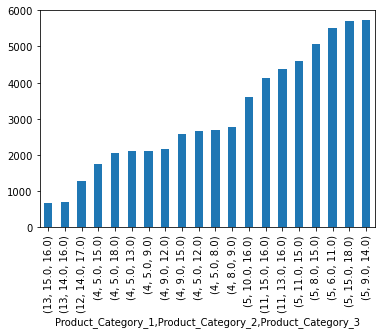

In [27]:
data.groupby(["Product_Category_1","Product_Category_2","Product_Category_3"]).Purchase.mean().sort_values().head(20).plot(kind="bar")

<AxesSubplot:xlabel='Product_Category_1,Product_Category_2,Product_Category_3'>

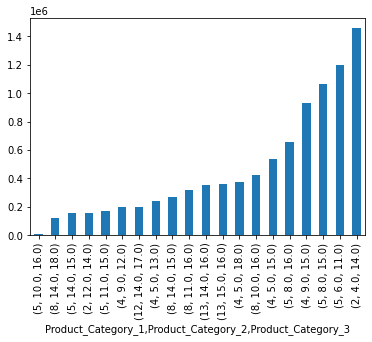

In [87]:
data.groupby(["Product_Category_1","Product_Category_2","Product_Category_3"]).Purchase.sum().sort_values().head(20).plot(kind="bar")

<AxesSubplot:xlabel='Gender'>

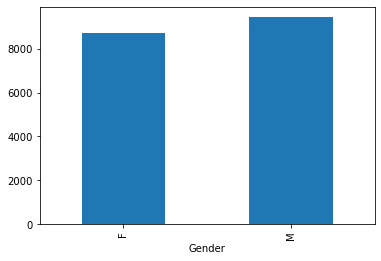

In [44]:
data.groupby("Gender").Purchase.mean().sort_values().plot(kind="bar")

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

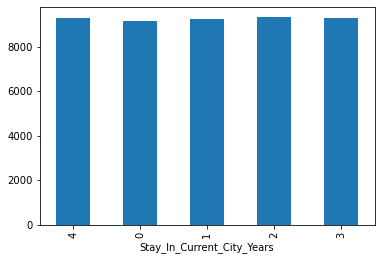

In [63]:
data.groupby("Stay_In_Current_City_Years").Purchase.mean().plot(kind="bar")

<AxesSubplot:xlabel='Marital_Status'>

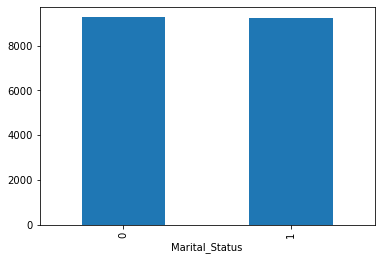

In [64]:
data.groupby("Marital_Status").Purchase.mean().plot(kind="bar")

<AxesSubplot:xlabel='Product_Category_1'>

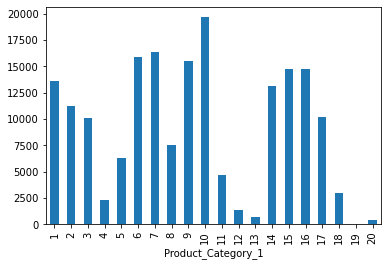

In [70]:
data.groupby("Product_Category_1").Purchase.mean().plot(kind="bar")

<AxesSubplot:xlabel='Product_Category_2'>

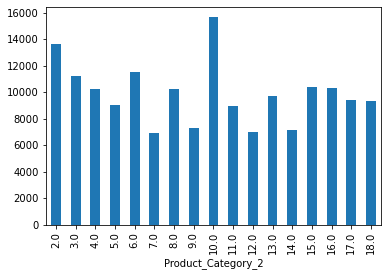

In [69]:
data.groupby("Product_Category_2").Purchase.mean().plot(kind="bar")

<AxesSubplot:xlabel='Product_Category_3'>

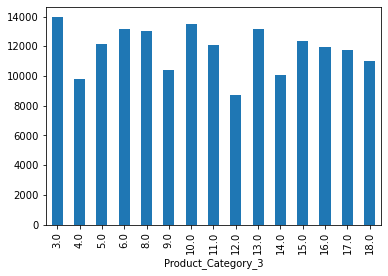

In [71]:
data.groupby("Product_Category_3").Purchase.mean().plot(kind="bar")

#Observation
____________________
•	No Duplicated rows are available 
•	5891 are unique  user ids out of 783667.
•	3677 are unique product id out of 783667
•	7 group of Age customer available with split value . need to get mean of them
•	Replace Gender : Male = 1 and Female =0
•	Replace City_Category : A=1,B=2,C=3
•	Replace Stay in current city years = 4+ to 4
•	Null Values:-
	Product_Category_2 = 245982 are null . Only 17 are Unique Prod category2 available. So We will have to fill NULL with Mean of Category2. Also check group of Category1  Fill with 0
	Product_Category_3 = 545809 are null. Only 15 are Unique Prod category3available. So We will have to fill NULL with Mean of Category3. Also check group of Category1 Fill with 0


#Group Age :- 

In [31]:
data[data["Age"].notna()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,test
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,test
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,test
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,test


In [33]:
data[data["Age"]=="55"]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data


In [32]:
data[data["Age"]=="55+"]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train
159,1000031,P00117442,M,55+,7,C,2,0,5,14.0,NaN,8596.0,train
160,1000031,P00322042,M,55+,7,C,2,0,5,8.0,NaN,5248.0,train
161,1000031,P00216342,M,55+,7,C,2,0,3,4.0,5.0,10592.0,train
162,1000031,P00329342,M,55+,7,C,2,0,5,NaN,NaN,3482.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233536,1005922,P00051442,M,55+,3,C,3,0,8,17.0,NaN,NaN,test
233541,1005948,P00083742,M,55+,13,B,0,0,2,17.0,NaN,NaN,test
233542,1005948,P00088442,M,55+,13,B,0,0,8,NaN,NaN,NaN,test
233560,1005980,P00085342,M,55+,1,C,3,0,10,13.0,NaN,NaN,test


In [34]:
data["Age"].replace({"55+":"56"},inplace = True)

In [36]:
data[data["Age"]=="56"]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
4,1000002,P00285442,M,56,16,C,4+,0,8,NaN,NaN,7969.0,train
159,1000031,P00117442,M,56,7,C,2,0,5,14.0,NaN,8596.0,train
160,1000031,P00322042,M,56,7,C,2,0,5,8.0,NaN,5248.0,train
161,1000031,P00216342,M,56,7,C,2,0,3,4.0,5.0,10592.0,train
162,1000031,P00329342,M,56,7,C,2,0,5,NaN,NaN,3482.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233536,1005922,P00051442,M,56,3,C,3,0,8,17.0,NaN,NaN,test
233541,1005948,P00083742,M,56,13,B,0,0,2,17.0,NaN,NaN,test
233542,1005948,P00088442,M,56,13,B,0,0,8,NaN,NaN,NaN,test
233560,1005980,P00085342,M,56,1,C,3,0,10,13.0,NaN,NaN,test


In [37]:
def check_float_convert(x):
    Age_new = x.split("-")
    if (len(Age_new))==2:
        return (float(Age_new[0]) + float(Age_new[1]))/2
    else:
        try:
            return float(x)
        except:
            return np.NAN

In [38]:
data["Age_processed"] = data["Age"].apply(check_float_convert)

In [39]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data,Age_processed
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train,8.5
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train,8.5
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train,8.5
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train,8.5
4,1000002,P00285442,M,56,16,C,4+,0,8,NaN,NaN,7969.0,train,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,test,30.5
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,test,30.5
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,test,30.5
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,test,48.0


In [40]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
data                               0
Age_processed                      0
dtype: int64

#Gender – Male = 1 and Female =0

In [45]:
data["Gender"].replace({"M":1,"F":0},inplace = True)

In [46]:
data["Gender"].value_counts()

1    590031
0    193636
Name: Gender, dtype: int64

#Replace City_Category : A=1,B=2,C=3

In [47]:
data["City_Category"].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [48]:
data["City_Category"].replace({"A":1,"B":2,"C":3},inplace=True)

In [49]:
data["City_Category"].value_counts()

2    329739
3    243684
1    210244
Name: City_Category, dtype: int64

#Replace Stay in current city years = 4+ to 4

In [51]:
data["Stay_In_Current_City_Years"].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  int64  
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  data                        783667 non-null  object 
 13  Age_processed 

In [56]:
data["Stay_In_Current_City_Years"].replace({"4+":4},inplace=True)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  int64  
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  data                        783667 non-null  object 
 13  Age_processed 

In [58]:
data["Stay_In_Current_City_Years"].value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [79]:
data[data["Product_Category_2"].isna()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data,Age_processed
0,1000001,P00069042,0,0-17,10,1,2,0,3,NaN,NaN,8370.0,train,8.5
2,1000001,P00087842,0,0-17,10,1,2,0,12,NaN,NaN,1422.0,train,8.5
4,1000002,P00285442,1,56,16,3,4,0,8,NaN,NaN,7969.0,train,56.0
9,1000005,P00274942,1,26-35,20,1,1,1,8,NaN,NaN,7871.0,train,30.5
11,1000005,P00014542,1,26-35,20,1,1,1,8,NaN,NaN,3957.0,train,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233576,1006003,P00313342,0,46-50,17,3,1,0,5,NaN,NaN,NaN,test,48.0
233585,1006025,P00161142,0,26-35,1,2,1,0,11,NaN,NaN,NaN,test,30.5
233590,1006032,P00252442,1,46-50,7,1,3,0,8,NaN,NaN,NaN,test,48.0
233593,1006036,P00255442,0,26-35,15,2,4,1,8,NaN,NaN,NaN,test,30.5


In [82]:
data[(data["Product_ID"]=='P00313342') & (data["Product_Category_2"].notna()) ]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data,Age_processed


In [84]:
data[data["Product_Category_3"].isna()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data,Age_processed
0,1000001,P00069042,0,0-17,10,1,2,0,3,NaN,NaN,8370.0,train,8.5
2,1000001,P00087842,0,0-17,10,1,2,0,12,NaN,NaN,1422.0,train,8.5
3,1000001,P00085442,0,0-17,10,1,2,0,12,14.0,NaN,1057.0,train,8.5
4,1000002,P00285442,1,56,16,3,4,0,8,NaN,NaN,7969.0,train,56.0
5,1000003,P00193542,1,26-35,15,1,3,0,1,2.0,NaN,15227.0,train,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233593,1006036,P00255442,0,26-35,15,2,4,1,8,NaN,NaN,NaN,test,30.5
233594,1006036,P00118942,0,26-35,15,2,4,1,8,NaN,NaN,NaN,test,30.5
233595,1006036,P00254642,0,26-35,15,2,4,1,5,8.0,NaN,NaN,test,30.5
233597,1006037,P00124742,0,46-50,1,3,4,0,10,16.0,NaN,NaN,test,48.0


In [85]:
data[(data["Product_ID"]=='P00085442') & (data["Product_Category_3"].notna()) ]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data,Age_processed


In [86]:
data[(data["Product_ID"]=='P00085442')]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data,Age_processed
3,1000001,P00085442,0,0-17,10,1,2,0,12,14.0,NaN,1057.0,train,8.5
322,1000053,P00085442,1,26-35,0,2,1,0,12,14.0,NaN,1752.0,train,30.5
973,1000169,P00085442,1,26-35,7,2,3,0,12,14.0,NaN,1434.0,train,30.5
2024,1000323,P00085442,1,46-50,12,3,1,0,12,14.0,NaN,1714.0,train,48.0
11978,1001796,P00085442,1,51-55,11,3,2,1,12,14.0,NaN,1423.0,train,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226847,1001587,P00085442,0,26-35,3,2,3,0,12,14.0,NaN,NaN,test,30.5
229759,1000035,P00085442,1,46-50,1,3,4,1,12,14.0,NaN,NaN,test,48.0
230357,1001051,P00085442,0,26-35,0,1,0,1,12,14.0,NaN,NaN,test,30.5
232668,1004579,P00085442,0,18-25,4,2,1,1,12,14.0,NaN,NaN,test,21.5


#Product_Category_2 = 245982 are null . Only 17 are Unique Prod category2 available.  ---> Fill 0 and check score 


#Product_Category_3 = 545809 are null. Only 15 are Unique Prod category3 available. --->---> Fill 0 and check score 

In [90]:
data["Product_Category_2"].fillna(value=0,inplace=True)

In [95]:

#data.groupby("Product_ID").Product_Category_2.transform(lambda x: x.fillna(x.mean()))

0          0.0
1          6.0
2          0.0
3         14.0
4          0.0
          ... 
233594     0.0
233595     8.0
233596     5.0
233597    16.0
233598     5.0
Name: Product_Category_2, Length: 783667, dtype: float64

In [91]:
data[data["Product_Category_2"].isna()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data,Age_processed


In [92]:
data["Product_Category_3"].fillna(value=0,inplace=True)

In [93]:
data[data["Product_Category_3"].isna()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data,Age_processed


In [96]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data,Age_processed
0,1000001,P00069042,0,0-17,10,1,2,0,3,0.0,0.0,8370.0,train,8.5
1,1000001,P00248942,0,0-17,10,1,2,0,1,6.0,14.0,15200.0,train,8.5
2,1000001,P00087842,0,0-17,10,1,2,0,12,0.0,0.0,1422.0,train,8.5
3,1000001,P00085442,0,0-17,10,1,2,0,12,14.0,0.0,1057.0,train,8.5
4,1000002,P00285442,1,56,16,3,4,0,8,0.0,0.0,7969.0,train,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,26-35,15,2,4,1,8,0.0,0.0,NaN,test,30.5
233595,1006036,P00254642,0,26-35,15,2,4,1,5,8.0,0.0,NaN,test,30.5
233596,1006036,P00031842,0,26-35,15,2,4,1,1,5.0,12.0,NaN,test,30.5
233597,1006037,P00124742,0,46-50,1,3,4,0,10,16.0,0.0,NaN,test,48.0


In [119]:
data = data.reset_index().drop(columns="index")

<AxesSubplot:>

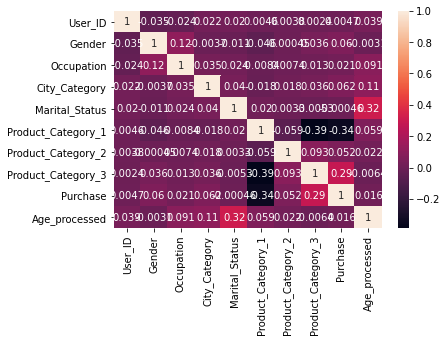

In [99]:
sns.heatmap(data.corr(),annot=True)

#Data Preparation

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  int64  
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  data                        783667 non-null  object 
 13  Age_processed 

In [123]:
data.select_dtypes(include=np.number).columns

Index(['User_ID', 'Gender', 'Occupation', 'City_Category', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase', 'Age_processed'],
      dtype='object')

In [124]:
numeric_data_columns=data.select_dtypes(include=np.number).drop(columns= ["User_ID","Purchase"]).columns

In [125]:
data.select_dtypes(exclude=np.number).columns

Index(['Product_ID', 'Age', 'Stay_In_Current_City_Years', 'data'], dtype='object')

In [132]:
category_data_columns=data.select_dtypes(exclude=np.number).drop(columns=["Product_ID","Age","data"]).columns

In [133]:
preprocess_category_data_columns = pd.get_dummies(data[category_data_columns])

In [134]:
scaler = StandardScaler()

In [135]:
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(data[numeric_data_columns]), columns=numeric_data_columns)

In [136]:
final_preprocessed = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns, data[["User_ID","Purchase","Product_ID","data"]]], axis = 1)

In [137]:
final_preprocessed 

,Stay_In_Current_City_Years_4,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Gender,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age_processed,User_ID,Purchase,Product_ID,data
0,0,0,0,1,0,-1.745599,0.294486,-1.372156,-0.833232,-0.610134,-1.086589,-0.614983,-2.357741,1000001,8370.0,P00069042,train
1,0,0,0,1,0,-1.745599,0.294486,-1.372156,-0.833232,-1.125843,-0.121369,1.624131,-2.357741,1000001,15200.0,P00248942,train
2,0,0,0,1,0,-1.745599,0.294486,-1.372156,-0.833232,1.710556,-1.086589,-0.614983,-2.357741,1000001,1422.0,P00087842,train
3,0,0,0,1,0,-1.745599,0.294486,-1.372156,-0.833232,1.710556,1.165591,-0.614983,-2.357741,1000001,1057.0,P00085442,train
4,1,0,0,0,0,0.572869,1.214421,1.259845,-0.833232,0.679138,-1.086589,-0.614983,1.983673,1000002,7969.0,P00285442,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1,0,0,0,0,-1.745599,1.061099,-0.056155,1.200146,0.679138,-1.086589,-0.614983,-0.346981,1006036,NaN,P00118942,test
783663,1,0,0,0,0,-1.745599,1.061099,-0.056155,1.200146,-0.094425,0.200371,-0.614983,-0.346981,1006036,NaN,P00254642,test
783664,1,0,0,0,0,-1.745599,1.061099,-0.056155,1.200146,-1.125843,-0.282239,1.304258,-0.346981,1006036,NaN,P00031842,test
783665,1,0,0,0,0,-1.745599,-1.085416,1.259845,-0.833232,1.194847,1.487331,-0.614983,1.252488,1006037,NaN,P00124742,test


In [142]:
train_preprocessed = final_preprocessed[final_preprocessed["data"]=="train"]

In [143]:
test_preprocessed = final_preprocessed[final_preprocessed["data"]=="test"]

In [144]:
train_preprocessed = train_preprocessed.drop(columns = ["data"])

In [145]:
test_preprocessed = test_preprocessed.drop(columns = ["data","Purchase"])

In [149]:
train_preprocessed.shape

(550068, 16)

In [150]:
test_preprocessed.shape

(233599, 15)

In [152]:
train_preprocessed.to_csv("train_preprocessed.csv", index = False)
test_preprocessed.to_csv("test_preprocessed.csv", index = False)